## Read data

In [1]:
import pandas as pd
import config_path
import os

In [2]:
data_v1 = pd.read_csv(os.path.join(config_path.data_path, 'raw', 'CancerRadiomicsKaggle_Stability_v1_042120.csv'))
data_v2 = pd.read_csv(os.path.join(config_path.data_path, 'raw', 'CancerRadiomicsKaggle_v2_050620.csv'))

In [3]:
data_v1.head(5)

,Doctor ID,Patient ID,v1,v2,v3,v4,v5,v6,v7,v8,...,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
0,1,1,2576.25,39.204592,2523.34375,42.767656,0.488701,9.917425,0.361771,0.726856,...,3732.052870,0.640057,0.001952,7.138687,0.001858,0.002814,5209.893177,12.194318,0.042216,0.051119
1,2,1,2080.50,39.204592,2033.00000,43.105744,0.495489,5.893125,0.367294,0.770437,...,1752.238636,0.662144,0.003066,7.043067,0.002865,0.002996,5717.296680,7.975850,0.061743,0.075541
2,3,1,2376.00,44.070965,2321.90625,47.047567,0.471206,5.829121,0.362637,0.775042,...,2863.166008,0.671965,0.001812,7.082423,0.001697,0.002704,5599.760835,8.102155,0.081455,0.065024
3,1,2,3420.75,32.958307,3380.59375,26.442014,0.621608,13.570378,0.656400,0.518366,...,899.295045,0.567038,0.006541,7.032535,0.003872,0.002332,1917.611508,3.833872,0.033679,0.152925
4,2,2,4675.50,30.757113,4643.84375,24.146454,0.664780,14.380366,0.908771,0.436027,...,2761.771795,0.619608,0.001782,7.348987,0.001629,0.001553,4400.525876,5.613430,0.027458,0.102798


In [4]:
data_v2.head(5)

,Patient ID,Gender,Age,Clinical A,Clinical B,Clinical C,Clinical D,Time to Event,Patient Status,Patient Status at 3 Year,...,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
0,1,1,51,1,0,1,0,993,0,-1,...,2863.166008,0.671965,0.001812,7.082423,0.001697,0.002704,5599.760835,8.102155,0.081455,0.065024
1,2,1,52,2,1,2,0,2806,0,0,...,5707.741822,0.691453,0.000859,7.755168,0.000796,0.001142,12788.777320,10.510535,0.042781,0.070754
2,3,2,39,1,1,2,0,1114,0,0,...,3735.571429,0.735593,0.001540,7.250617,0.001460,0.002040,10151.403250,12.556235,0.085777,0.059948
3,4,1,47,1,1,2,0,1580,0,0,...,7189.520541,0.775392,0.001576,7.601097,0.001290,0.001179,24152.978110,25.953500,0.082586,0.040302
4,5,1,43,2,1,2,0,1435,0,0,...,7122.637996,0.756142,0.001447,7.450933,0.001233,0.001903,20879.171310,33.389569,0.068150,0.029494


## Process data

In [5]:
from sklearn import preprocessing

In [6]:
# Remove the uncomplete samples
index_to_delete = data_v2[data_v2['Patient Status at 3 Year'] == -1].index
processed_data_v2 = data_v2.copy()
processed_data_v2.drop(index_to_delete, inplace=True)

# Create x-y-based data
X = processed_data_v2.drop(['Patient ID', 'Time to Event', 'Patient Status', 'Patient Status at 3 Year'], axis=1)
y = processed_data_v2['Patient Status at 3 Year']
y = y.reset_index(drop=True)

# Normalize
data_array = X.values
scaler = preprocessing.StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
X = pd.DataFrame(data_scaled, columns=list(X.columns.values))

In [7]:
X.head(5)

,Gender,Age,Clinical A,Clinical B,Clinical C,Clinical D,v1,v2,v3,v4,...,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
0,-0.515978,0.244683,-0.354224,-1.24296,-1.823737,-0.34025,-0.643969,-0.918799,-0.643745,-1.058283,...,-0.184194,0.121761,-0.287112,0.358863,-0.225831,0.331645,-0.332515,0.100941,-0.030756,-0.781059
1,1.938065,-0.993382,-1.355290,-1.24296,-1.823737,-0.34025,-0.802291,-0.964595,-0.801776,-0.907695,...,-0.728204,0.997299,0.151826,-0.726514,0.296697,1.233996,-0.434427,0.360163,0.527254,-0.848246
2,-0.515978,-0.231496,-1.355290,-1.24296,-1.823737,-0.34025,-0.682710,-0.664686,-0.683158,-0.202746,...,0.224545,1.786734,0.174952,0.027430,0.163256,0.368944,0.106615,2.057805,0.485848,-0.970387
3,-0.515978,-0.612439,-0.354224,-1.24296,-1.823737,-0.34025,-0.792153,-0.674818,-0.791992,-0.088109,...,0.206096,1.404901,0.091899,-0.295599,0.117915,1.096670,-0.019890,3.000071,0.298487,-1.037583
4,-0.515978,1.197040,-1.355290,-1.24296,-1.823737,-0.34025,-0.674682,-0.388673,-0.675164,-0.377239,...,0.597576,0.257517,-0.327200,0.040125,-0.261389,0.357856,-0.241252,0.913230,-0.171335,-0.919325


## Explore data
### 0. Conclusion
- The data contains hand-crafted features and image-based features.
- The data is imbalanced.

In [8]:
import matplotlib.pyplot as plt
from utils import basic_units
import numpy as np
import seaborn as sns

### 1. Class distribution

In [9]:
def plot_class_distribution(y):
    
    unique, counts = np.unique(y, return_counts=True)
    label_count = dict(zip(unique, counts))
    
    N = len(unique)

    fig, ax = plt.subplots()
    ax.grid(linestyle='--', zorder=0, axis='y')
    ax.set_axisbelow(True)

    ind = np.arange(N)/N
    width = 0.1
    
    p_values = tuple()
    for label in label_count:
        p_values += (label_count[label],)
    
    p = ax.bar(ind, p_values, width, bottom=0*basic_units.cm, color='black')
    
    x_ticks = tuple(unique)
    ax.set_title('class distribution')
    ax.set_xticks(ind)
    ax.set_xticklabels(x_ticks)
    ax.set_ylabel('number of samples')
    ax.set_xlabel('class')

    ax.yaxis.set_units(basic_units.inch)
    ax.autoscale_view()

    plt.show()

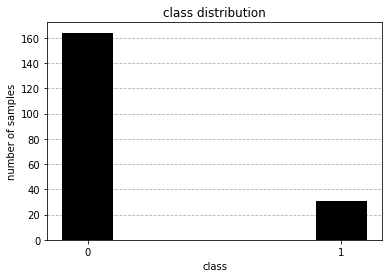

In [10]:
plot_class_distribution(y)

According to the distribution graph, the data is imbalanced.

## Pairwise relationships

In [11]:
handcrafted_X = X[['Gender', 'Age', 'Clinical A', 'Clinical B', 'Clinical C', 'Clinical D']]
imagebased_X = X[['v' + str(i) for i in range(1, 843)]]

In [12]:
handcrafted_X.head(1)

,Gender,Age,Clinical A,Clinical B,Clinical C,Clinical D
0,-0.515978,0.244683,-0.354224,-1.24296,-1.823737,-0.34025


In [13]:
imagebased_X.head(1)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v833,v834,v835,v836,v837,v838,v839,v840,v841,v842
0,-0.643969,-0.918799,-0.643745,-1.058283,1.153118,-0.654919,0.891271,0.183706,-1.108919,0.751132,...,-0.184194,0.121761,-0.287112,0.358863,-0.225831,0.331645,-0.332515,0.100941,-0.030756,-0.781059


In [14]:
df_to_plot = pd.concat([handcrafted_X, y], axis=1)

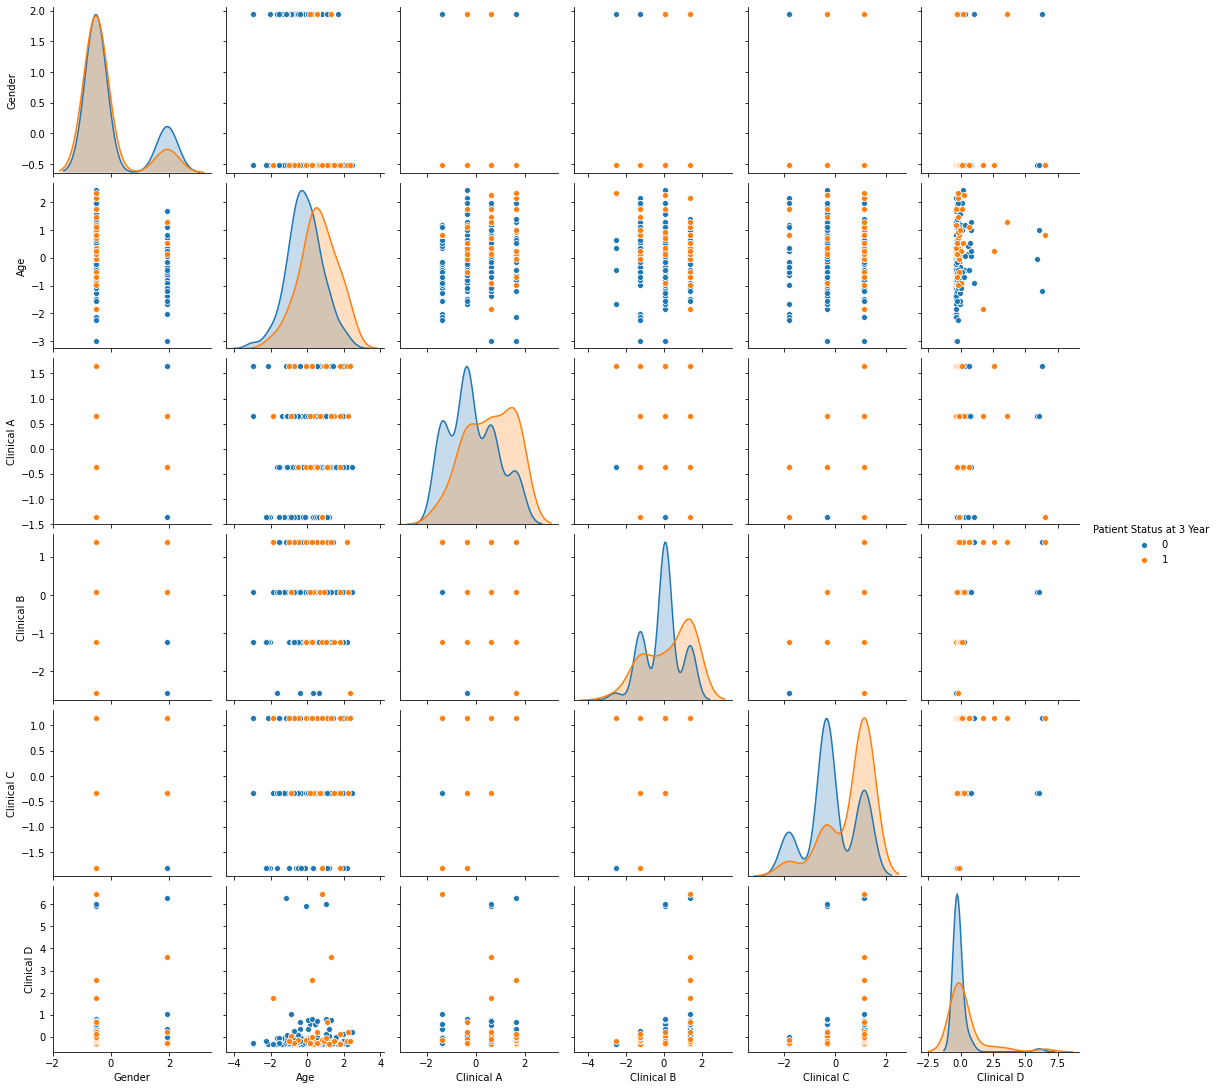

In [89]:
sns.pairplot(df_to_plot, hue='Patient Status at 3 Year');

## Split data into training and test sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
def split_data(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0, stratify=y)

    print("Training samples: {0}".format(y_train.shape[0]))
    print("Test samples: {0}".format(y_test.shape[0]))

    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = split_data(X, y)

Training samples: 156
Test samples: 39


## Save to files

In [18]:
from config_path import ROOT_DIR

In [19]:
def save_array_to_file(array, path):
    np.save(path, array)

def save_Xy(X, y, _type):
    
    data_folder_path = os.path.join(ROOT_DIR, 'data')

    if not os.path.isdir(data_folder_path):
        os.mkdir(data_folder_path)
        
    _type_folder_path = os.path.join(data_folder_path, _type)
        
    if not os.path.isdir(_type_folder_path):
        os.mkdir(_type_folder_path)
        
    save_array_to_file(X, os.path.join(_type_folder_path, 'X.npy'))
    save_array_to_file(y, os.path.join(_type_folder_path, 'y.npy'))
    
    

In [20]:
save_Xy(X_train, y_train, 'train')
save_Xy(X_test, y_test, 'test')

# Build model

In [21]:
from sklearn import metrics
from utils.CSSVM.python.cssvmutil import *

### A. Train model with only hand-crafted features (Gender, Age, Clinical A-D)

1. Pre-process

Note: the data was already normalized.

In [24]:
handcrafted_X_train = np.array(X_train[['Gender', 'Age', 'Clinical A', 'Clinical B', 'Clinical C', 'Clinical D']])
handcrafted_X_test = np.array(X_test[['Gender', 'Age', 'Clinical A', 'Clinical B', 'Clinical C', 'Clinical D']])
y_train = np.array(y_train)
y_test = np.array(y_test)

2. Train

In [ ]:
def train_cssvm(X_train, y_train, X_test, y_test):
    
    X_train = [dict(enumerate(i, 1)) for i in X_train]
    X_test = [dict(enumerate(i, 1)) for i in X_test]
    y_train = [1.0 if _y>0 else -1.0 for _y in y_train]
    y_test = [1.0 if _y>0 else -1.0 for _y in y_test]

    C_range = [10**x for x in range(-6, 7)]
    Cp_range = [1, 5, 10, 50, 100]
    k_range = [1, 0.975, 0.95, 0.925, 0.9, 0.7, 0.6, 0.5, 0.3, 0.4, 0.2, 0.1, 0.01]

    f1_comparable = -np.Infinity

    best_model = None

    for C in C_range:
        for Cp in Cp_range:
            for k in k_range:
                Cn = 1/k
                kernel = 2 # -t 0 is linear kernel, 2 is rbf
                params = '-c {0} -w1 {1} -w-1 {2} -t {3} -q'.format(C, Cp, Cn, kernel)
                model = svm_train(y_train, X_train, params)
                y_pred, p_acc, p_val = svm_predict(y_test, X_test, model)
                y_pred = [1.0 if _y>0 else 0.0 for _y in y_pred]
                old_y_test = [1.0 if _y>0 else 0.0 for _y in y_test]

                f1 = metrics.f1_score(old_y_test, y_pred)

                if f1 >= f1_comparable:
                    f1_comparable = f1
                    best_model = model
    return best_model

In [ ]:
optimal_model = train_cssvm(handcrafted_X_train, y_train, handcrafted_X_test, y_test)

3. Evaluate

In [31]:
def get_prediction_cssvm(X_test, y_test, model):
    test = [dict(enumerate(i, 1)) for i in X_test]
    y_pred, p_acc, p_val = svm_predict(y_test, test, model)
    y_pred = [1.0 if _y>0 else 0.0 for _y in y_pred]
    old_y_test = [1.0 if _y>0 else 0.0 for _y in y_test]
    return y_pred, old_y_test

In [32]:
y_test_pred, _ = get_prediction_cssvm(handcrafted_X_test, y_test, optimal_model)

In [33]:
print(metrics.classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       0.55      1.00      0.71         6

    accuracy                           0.87        39
   macro avg       0.77      0.92      0.81        39
weighted avg       0.93      0.87      0.89        39



### B. Train model with only image-based features (v1-842)

1. Pre-process

Note: the data was already normalized.

In [34]:
imagebased_X_train = np.array(X_train[['v' + str(i) for i in range(1, 843)]])
imagebased_X_test = np.array(X_test[['v' + str(i) for i in range(1, 843)]])

2. Train

In [35]:
optimal_model = train_cssvm(imagebased_X_train, y_train, imagebased_X_test, y_test)

3. Evaluate

In [36]:
y_test_pred, _ = get_prediction_cssvm(imagebased_X_test, y_test, optimal_model)

In [37]:
print(metrics.classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.71      0.83      0.77         6

    accuracy                           0.92        39
   macro avg       0.84      0.89      0.86        39
weighted avg       0.93      0.92      0.93        39



### C. Train model with both (BEST)

1. Pre-process

Note: the data was already normalized.

In [38]:
both_X_train = np.array(X_train)
both_X_test = np.array(X_test)

2. Train

In [39]:
optimal_model = train_cssvm(both_X_train, y_train, both_X_test, y_test)

3. Evaluate

In [40]:
y_test_pred, _ = get_prediction_cssvm(both_X_test, y_test, optimal_model)

In [41]:
print(metrics.classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.83      0.83      0.83         6

    accuracy                           0.95        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.95      0.95      0.95        39



### D. Apply PCA to image-based data

In [43]:
from sklearn.decomposition import PCA

In [82]:
def select_features_pca(X_train, X_test, threshold = 0.95):

    pca_model = PCA(threshold)
    pca_model.fit(X_train)

    n_components = pca_model.n_components_
    print("Number of seleceted components: {0} ({1})".format(n_components, X_train.shape[1]))

    X_train_pca = pca_model.transform(X_train)
    X_test_pca = pca_model.transform(X_test)

    return X_train_pca, X_test_pca

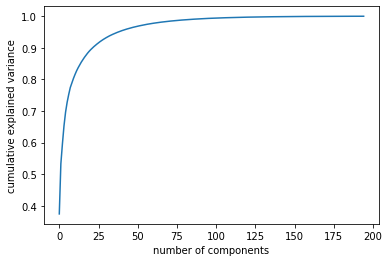

In [83]:
pca = PCA().fit(imagebased_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

1. Pre-process

In [84]:
handcrafted_X_train = np.array(X_train[['Gender', 'Age', 'Clinical A', 'Clinical B', 'Clinical C', 'Clinical D']])
imagebased_X_train = np.array(X_train[['v' + str(i) for i in range(1, 843)]])
handcrafted_X_test = np.array(X_test[['Gender', 'Age', 'Clinical A', 'Clinical B', 'Clinical C', 'Clinical D']])
imagebased_X_test = np.array(X_test[['v' + str(i) for i in range(1, 843)]])

In [85]:
# Reduce dimensions of image-based data
imagebased_X_train, imagebased_X_test = select_features_pca(imagebased_X_train, imagebased_X_test)

Number of seleceted components: 36 (842)


In [86]:
# Concatenate
both_X_train = np.concatenate((handcrafted_X_train, imagebased_X_train), axis=1)
both_X_test = np.concatenate((handcrafted_X_test, imagebased_X_test), axis=1)

2. Train

In [87]:
optimal_model = train_cssvm(both_X_train, y_train, both_X_test, y_test)

3. Evaluate

In [88]:
y_test_pred, _ = get_prediction_cssvm(both_X_test, y_test, optimal_model)
print(metrics.classification_report(y_test, y_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.17      0.29         6

    accuracy                           0.87        39
   macro avg       0.93      0.58      0.61        39
weighted avg       0.89      0.87      0.83        39

